In [0]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import json
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

--2019-11-23 01:53:16--  http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip [following]
--2019-11-23 01:53:16--  https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81363704 (78M) [application/zip]
Saving to: ‘trainingandtestdata.zip’

trainingandtestdata 100%[===================>]  77.59M  87.4MB/s    in 0.9s    

2019-11-23 01:53:17 (87.4 MB/s) - ‘trainingandtestdata.zip’ saved [81363704/81363704]



In [0]:
!unzip trainingandtestdata.zip

Archive:  trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [0]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', usecols=[0, 5], header=None, names=['sentiment', 'text'], dtype={'sentiment': int, 'text': str}, encoding='latin_1')

In [0]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1600000 non-null int64
text         1600000 non-null object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [0]:
df.groupby('sentiment').count()

,text
sentiment,
0,800000
4,800000


In [23]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip

--2019-11-23 02:33:50--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2019-11-23 02:33:51--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2019-11-23 02:33:51--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [24]:
!unzip glove.twitter.27B.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [0]:
url_tok = re.compile(r'https?://\S+\b|www\.[^ ]+') # sub with '<URL>'
mention_tok = re.compile(r'@\w+') #sub with '<USER>'
neg_tok = re.compile(r"n't\b") # sub with " not"

def clean_tweet(tweet):

  cleaned = tweet.lower()
  
  # cleans up html encoding, ex. &amp; -> &
  cleaned = BeautifulSoup(tweet, 'lxml').get_text()

  try:
    cleaned = bytes(cleaned, encoding='latin_1').decode('utf-8-sig').replace(u"\ufffd", "?")
  except:
    cleaned = cleaned

  cleaned = neg_tok.sub(" not", cleaned)    
  cleaned = url_tok.sub('<URL>', cleaned)
  cleaned = mention_tok.sub('<USER>', cleaned)
  cleaned = re.sub("[^a-zA-Z<>:;\(\)]", " ", cleaned)

  return cleaned


In [0]:
clean_tweet_texts = []
for i in range(0,1600000):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, 1600000 ))                                                                    
    clean_tweet_texts.append(clean_tweet(df['text'][i]))

Tweets 10000 of 1600000 has been processed
Tweets 20000 of 1600000 has been processed
Tweets 30000 of 1600000 has been processed
Tweets 40000 of 1600000 has been processed
Tweets 50000 of 1600000 has been processed
Tweets 60000 of 1600000 has been processed
Tweets 70000 of 1600000 has been processed
Tweets 80000 of 1600000 has been processed
Tweets 90000 of 1600000 has been processed
Tweets 100000 of 1600000 has been processed
Tweets 110000 of 1600000 has been processed
Tweets 120000 of 1600000 has been processed
Tweets 130000 of 1600000 has been processed
Tweets 140000 of 1600000 has been processed
Tweets 150000 of 1600000 has been processed
Tweets 160000 of 1600000 has been processed
Tweets 170000 of 1600000 has been processed
Tweets 180000 of 1600000 has been processed
Tweets 190000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 210000 of 1600000 has been processed
Tweets 220000 of 1600000 has been processed
Tweets 230000 of 1600000 has been process

In [0]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['sentiment'] = df.sentiment
clean_df.head()

,text,sentiment
0,<USER> <URL> Awww that s a bummer You sho...,0
1,is upset that he ca not update his Facebook by...,0
2,<USER> I dived many times for the ball Manage...,0
3,my whole body feels itchy and like its on fire,0
4,<USER> no it s not behaving at all i m mad ...,0


In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
Unnamed: 0    1600000 non-null int64
text          1600000 non-null object
sentiment     1600000 non-null int64
dtypes: int64(2), object(1)
memory usage: 36.6+ MB


In [0]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'

In [0]:
!zip clean_tweets.zip clean_tweet.csv

  adding: clean_tweet.csv (deflated 60%)


In [3]:
!unzip "/content/drive/My Drive/Colab Notebooks/clean_tweets.zip"

Archive:  /content/drive/My Drive/Colab Notebooks/clean_tweets.zip
  inflating: clean_tweet.csv         


In [0]:
clean_df = pd.read_csv('clean_tweet.csv')

In [7]:
clean_df.head()

,Unnamed: 0,text,sentiment
0,0,<USER> <URL> Awww that s a bummer You sho...,0
1,1,is upset that he ca not update his Facebook by...,0
2,2,<USER> I dived many times for the ball Manage...,0
3,3,my whole body feels itchy and like its on fire,0
4,4,<USER> no it s not behaving at all i m mad ...,0


In [25]:

embeddings_index = {}
f = open('glove.twitter.27B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
%tensorflow_version 1.x

max_len = 250
embedding_dim = 100
max_words = 30000

Using TensorFlow backend.


In [0]:
texts = clean_df['text'].values
labels = []
for label in clean_df['sentiment']:
  if (label == 0):
    labels.append(0)
  else:
    labels.append(1)

In [0]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [0]:
# save tokenizer
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer.to_json(), ensure_ascii=False))

In [22]:
!zip "/content/drive/My Drive/Colab Notebooks/tokenizer_json.zip" tokenizer.json

  adding: tokenizer.json (deflated 74%)


In [0]:
# extract tokenizer
# !unzip "/content/drive/My Drive/Colab Notebooks/tokenizer_json.zip"

In [0]:
# load tokenizer
# with open('tokenizer.json') as j:
#    tokenizer = tokenizer_from_json(json.load(j))

In [14]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=max_len)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 265437 unique tokens.
Shape of data tensor: (1600000, 250)
Shape of label tensor: (1600000,)


In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 150000
test_samples = 20000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples:training_samples + test_samples]
y_test = labels[training_samples:training_samples + test_samples]

In [0]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM, Dense


In [0]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 100)          3000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 3,083,665
Trainable params: 83,665
Non-trainable params: 3,000,000
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)



Train on 105000 samples, validate on 45000 samples
Epoch 1/10
105000/105000 [==============================] - 432s 4ms/step - loss: 0.5305 - acc: 0.7297 - val_loss: 0.5305 - val_acc: 0.7297
Epoch 2/10
105000/105000 [==============================] - 431s 4ms/step - loss: 0.4767 - acc: 0.7689 - val_loss: 0.4800 - val_acc: 0.7612
Epoch 3/10
105000/105000 [==============================] - 431s 4ms/step - loss: 0.4568 - acc: 0.7825 - val_loss: 0.4468 - val_acc: 0.7911
Epoch 4/10
105000/105000 [==============================] - 430s 4ms/step - loss: 0.4426 - acc: 0.7909 - val_loss: 0.4290 - val_acc: 0.7992
Epoch 5/10
105000/105000 [==============================] - 438s 4ms/step - loss: 0.4317 - acc: 0.7986 - val_loss: 0.4225 - val_acc: 0.8039
Epoch 6/10
105000/105000 [==============================] - 434s 4ms/step - loss: 0.4232 - acc: 0.8040 - val_loss: 0.4181 - val_acc: 0.8058
Epoch 7/10
105000/105000 [==============================] - 434s 4ms/step - loss: 0.4158 - acc: 0.8066 - va

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/twit-sent-model-orig-glove-embed-lstm-dense-10-epochs.h5')

In [0]:
# to reload
# from keras.models import load_model
# model = load_model('...')

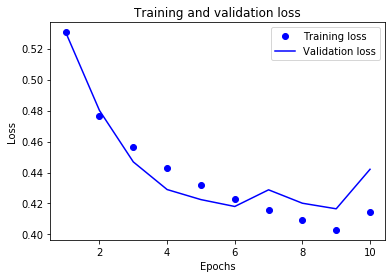

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

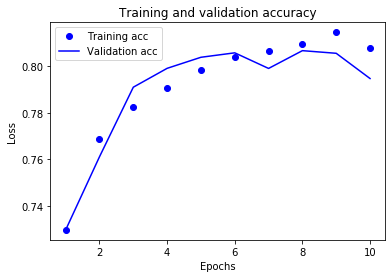

In [0]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
import keras.backend as kb

print(kb.get_value(model.optimizer.lr))

0.001


In [0]:
results = model.evaluate(x_test, y_test)
results

20000/20000 [==============================] - 110s 5ms/step


[0.4520282346010208, 0.792]

In [0]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Train on 105000 samples, validate on 45000 samples
Epoch 1/10
105000/105000 [==============================] - 435s 4ms/step - loss: 0.4211 - acc: 0.8045 - val_loss: 0.4236 - val_acc: 0.8037
Epoch 2/10
105000/105000 [==============================] - 434s 4ms/step - loss: 0.4050 - acc: 0.8139 - val_loss: 0.4184 - val_acc: 0.8067
Epoch 3/10
105000/105000 [==============================] - 433s 4ms/step - loss: 0.3929 - acc: 0.8213 - val_loss: 0.4135 - val_acc: 0.8080
Epoch 4/10
105000/105000 [==============================] - 433s 4ms/step - loss: 0.3852 - acc: 0.8246 - val_loss: 0.4134 - val_acc: 0.8079
Epoch 5/10
105000/105000 [==============================] - 432s 4ms/step - loss: 0.3799 - acc: 0.8268 - val_loss: 0.4187 - val_acc: 0.8110
Epoch 6/10
105000/105000 [==============================] - 433s 4ms/step - loss: 0.3745 - acc: 0.8295 - val_loss: 0.4142 - val_acc: 0.8114
Epoch 7/10
105000/105000 [==============================] - 432s 4ms/step - loss: 0.3696 - acc: 0.8331 - val_

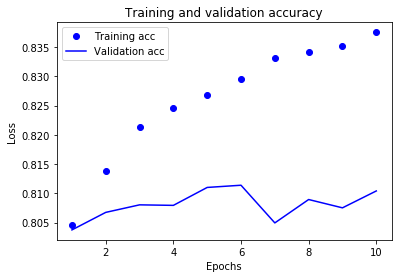

In [0]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/twit-sent-model-orig-glove-embed-lstm-dense-20-epochs.h5')

In [0]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/twit-sent-model-orig-glove-embed-lstm-dense-20-epochs.h5')

In [0]:
results = model.evaluate(x_test, y_test)
results

In [0]:
model.predict_proba(x_test[:10])

array([[0.9977819 ],
       [0.82548153],
       [0.73944235],
       [0.6171497 ],
       [0.8794742 ],
       [0.9912259 ],
       [0.53018516],
       [0.01517987],
       [0.46947083],
       [0.00867346]], dtype=float32)

In [0]:
model.predict_classes(x_test[:10])

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [0]:
y_test[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [0]:
probs = model.predict_proba(x_test)

In [0]:
def accuracy_with_threshold(threshold, probs, y_test):

  total = 0
  correct = 0

  length = len(probs)


  for i in range(0, length):
    if (probs[i] >= threshold):
      total = total + 1
      if (y_test[i] == 1):
        correct = correct + 1
  
    elif (probs[i] <= 1 - threshold):
      total = total + 1
      if (y_test[i] == 0):
        correct = correct + 1



  print("Number unused: " + str(length - total))
  print("Percent unused: " + str((length - total) / length))
  print("Accuracy with threshold: " + str(correct / total))

In [31]:
accuracy_with_threshold(0.5000000000001, probs, y_test)

Number unused: 0
Percent unused: 0.0
Accuracy with threshold: 0.81865


In [32]:
accuracy_with_threshold(0.6, probs, y_test)

Number unused: 2036
Percent unused: 0.1018
Accuracy with threshold: 0.8519817412602984


In [33]:
accuracy_with_threshold(0.7, probs, y_test)

Number unused: 4199
Percent unused: 0.20995
Accuracy with threshold: 0.8831086640086071


In [34]:
accuracy_with_threshold(0.8, probs, y_test)

Number unused: 6668
Percent unused: 0.3334
Accuracy with threshold: 0.9088658865886589


In [0]:
from keras.models import load_model
model10 = load_model('/content/drive/My Drive/Colab Notebooks/twit-sent-model-orig-glove-embed-lstm-dense-10-epochs.h5')

In [0]:
probs10 = model10.predict_proba(x_test)

In [0]:
accuracy_with_threshold(0.6, probs10, y_test)

Number unused: 2193
Percent unused: 0.10965
Accuracy with threshold: 0.8237210085921267


In [0]:
accuracy_with_threshold(0.7, probs10, y_test)

Number unused: 4653
Percent unused: 0.23265
Accuracy with threshold: 0.8553463217566951


In [0]:
accuracy_with_threshold(0.8, probs10, y_test)

Number unused: 7929
Percent unused: 0.39645
Accuracy with threshold: 0.8896528870847485
